<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#2-Nodes" data-toc-modified-id="2-Nodes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>2 Nodes</a></span><ul class="toc-item"><li><span><a href="#initial-setup" data-toc-modified-id="initial-setup-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>initial setup</a></span></li><li><span><a href="#new-init" data-toc-modified-id="new-init-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>new init</a></span></li><li><span><a href="#Comparison-of-both-init-schemes" data-toc-modified-id="Comparison-of-both-init-schemes-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Comparison of both init schemes</a></span></li><li><span><a href="#Hypotheses" data-toc-modified-id="Hypotheses-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Hypotheses</a></span><ul class="toc-item"><li><span><a href="#Cost-of-rebalancing-edges-not-properly-updated" data-toc-modified-id="Cost-of-rebalancing-edges-not-properly-updated-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Cost of rebalancing edges not properly updated</a></span></li><li><span><a href="#The-first-few-graphs-have-costs-that-are-not-properly-initialized" data-toc-modified-id="The-first-few-graphs-have-costs-that-are-not-properly-initialized-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>The first few graphs have costs that are not properly initialized</a></span></li><li><span><a href="#The-initialization-is-not-correct-(in-the-end,-it-is-the-only-thing-that-changes)" data-toc-modified-id="The-initialization-is-not-correct-(in-the-end,-it-is-the-only-thing-that-changes)-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>The initialization is not correct (in the end, it is the only thing that changes)</a></span></li></ul></li></ul></li><li><span><a href="#10-Nodes" data-toc-modified-id="10-Nodes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>10 Nodes</a></span></li></ul></div>

# Goal

We have **expectation** with the new init that currently are not met
- essentially breaking the lower limit on balance norm

There are currently two problems: 
- Cost increasing
- Not knowing whether the initialization actually provides a feasible point. 

The second point is addressed in another notebook, for 2 Nodes only.

what are the possible problems? 
- assign flows to "dead" edges (rebalancing edges). 
- costs are not properly computed

Compare the flows from other iterations where you are sure you remain in feasible territory. 

You will see that some edges that are usually always zero are not in this case. 

It must be during the initialization. 

# Conclusions

There is a problem as the total costs within inner iterations are increasing.This should not be. Why? We are solving FW with fixed rebalancers. We know how to solve this. Indeed, we simply add OD pairs and that's it. 

Therefore, what can go wrong? **The initialization**. It is the only thing that has changed lately!!

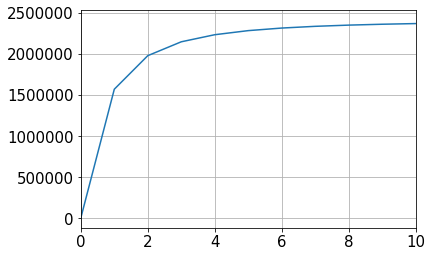

In [56]:
plt.figure()
plt.plot(opt_res[-1]['obj'])
plt.xlim([0,10])
plt.grid()

The objective is monotonically increasing -- constantly

# Load

In [2]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import pandas as pd

from amod_ed.result_analysis import plot_ri, print_final_flows, plot_cost_all_path, plot_ri_list, plot_balance_list
from amod_ed.result_analysis import plot_stop_and_cost

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
subfolder='unstucking_balance'

# 2 Nodes

## initial setup

In [160]:
n_nodes=2

In [161]:
path='Data/'+str(n_nodes)+'Nodes_back2basics/outputs/'+subfolder

In [162]:
print(os.listdir(path))

['new_init.pkl', 'initial_setup.pkl']


In [163]:
filename=os.listdir(path)[1]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

initial_setup.pkl


In [165]:
opt_res1 = opt_res

In [86]:
params

{'L': 10000,
 'ni': 1000,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

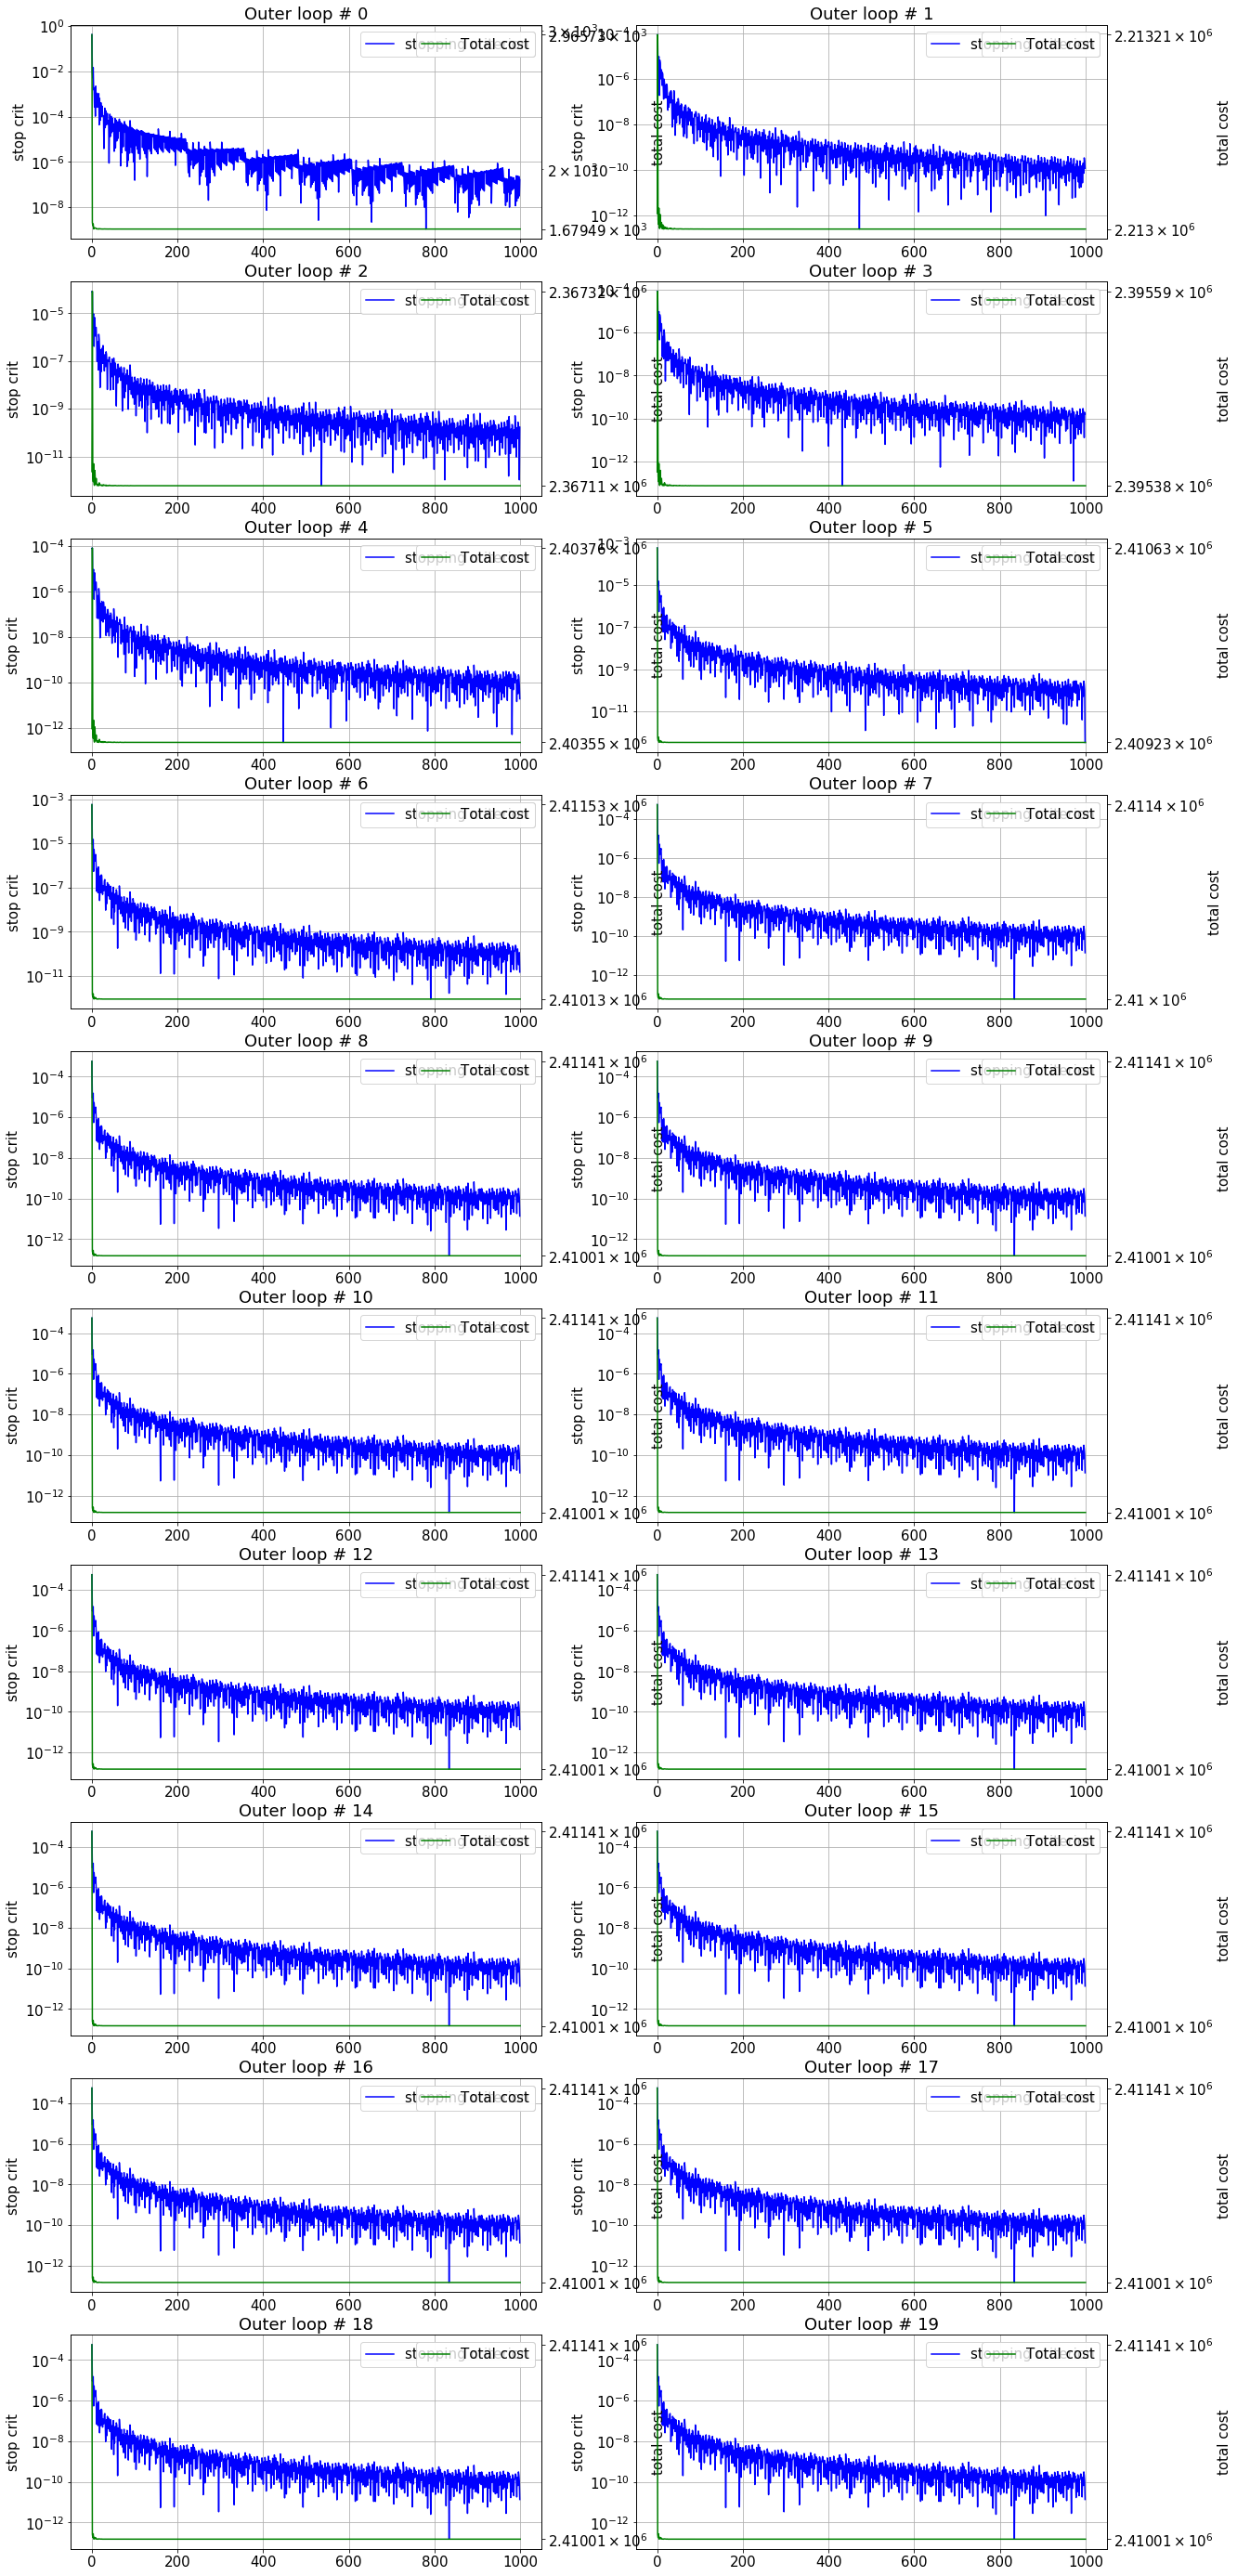

In [125]:
plot_stop_and_cost(opt_res)

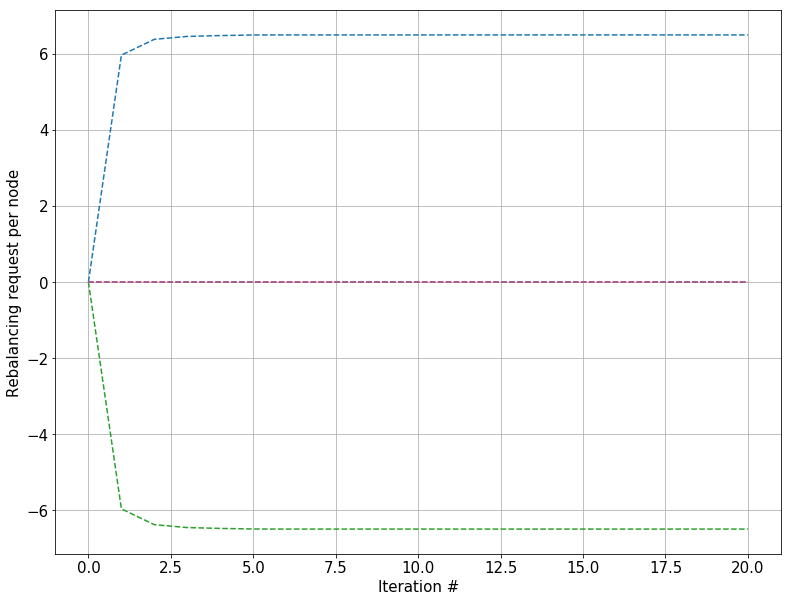

In [126]:
plot_ri_list(ri_FW, save = False, path = None)

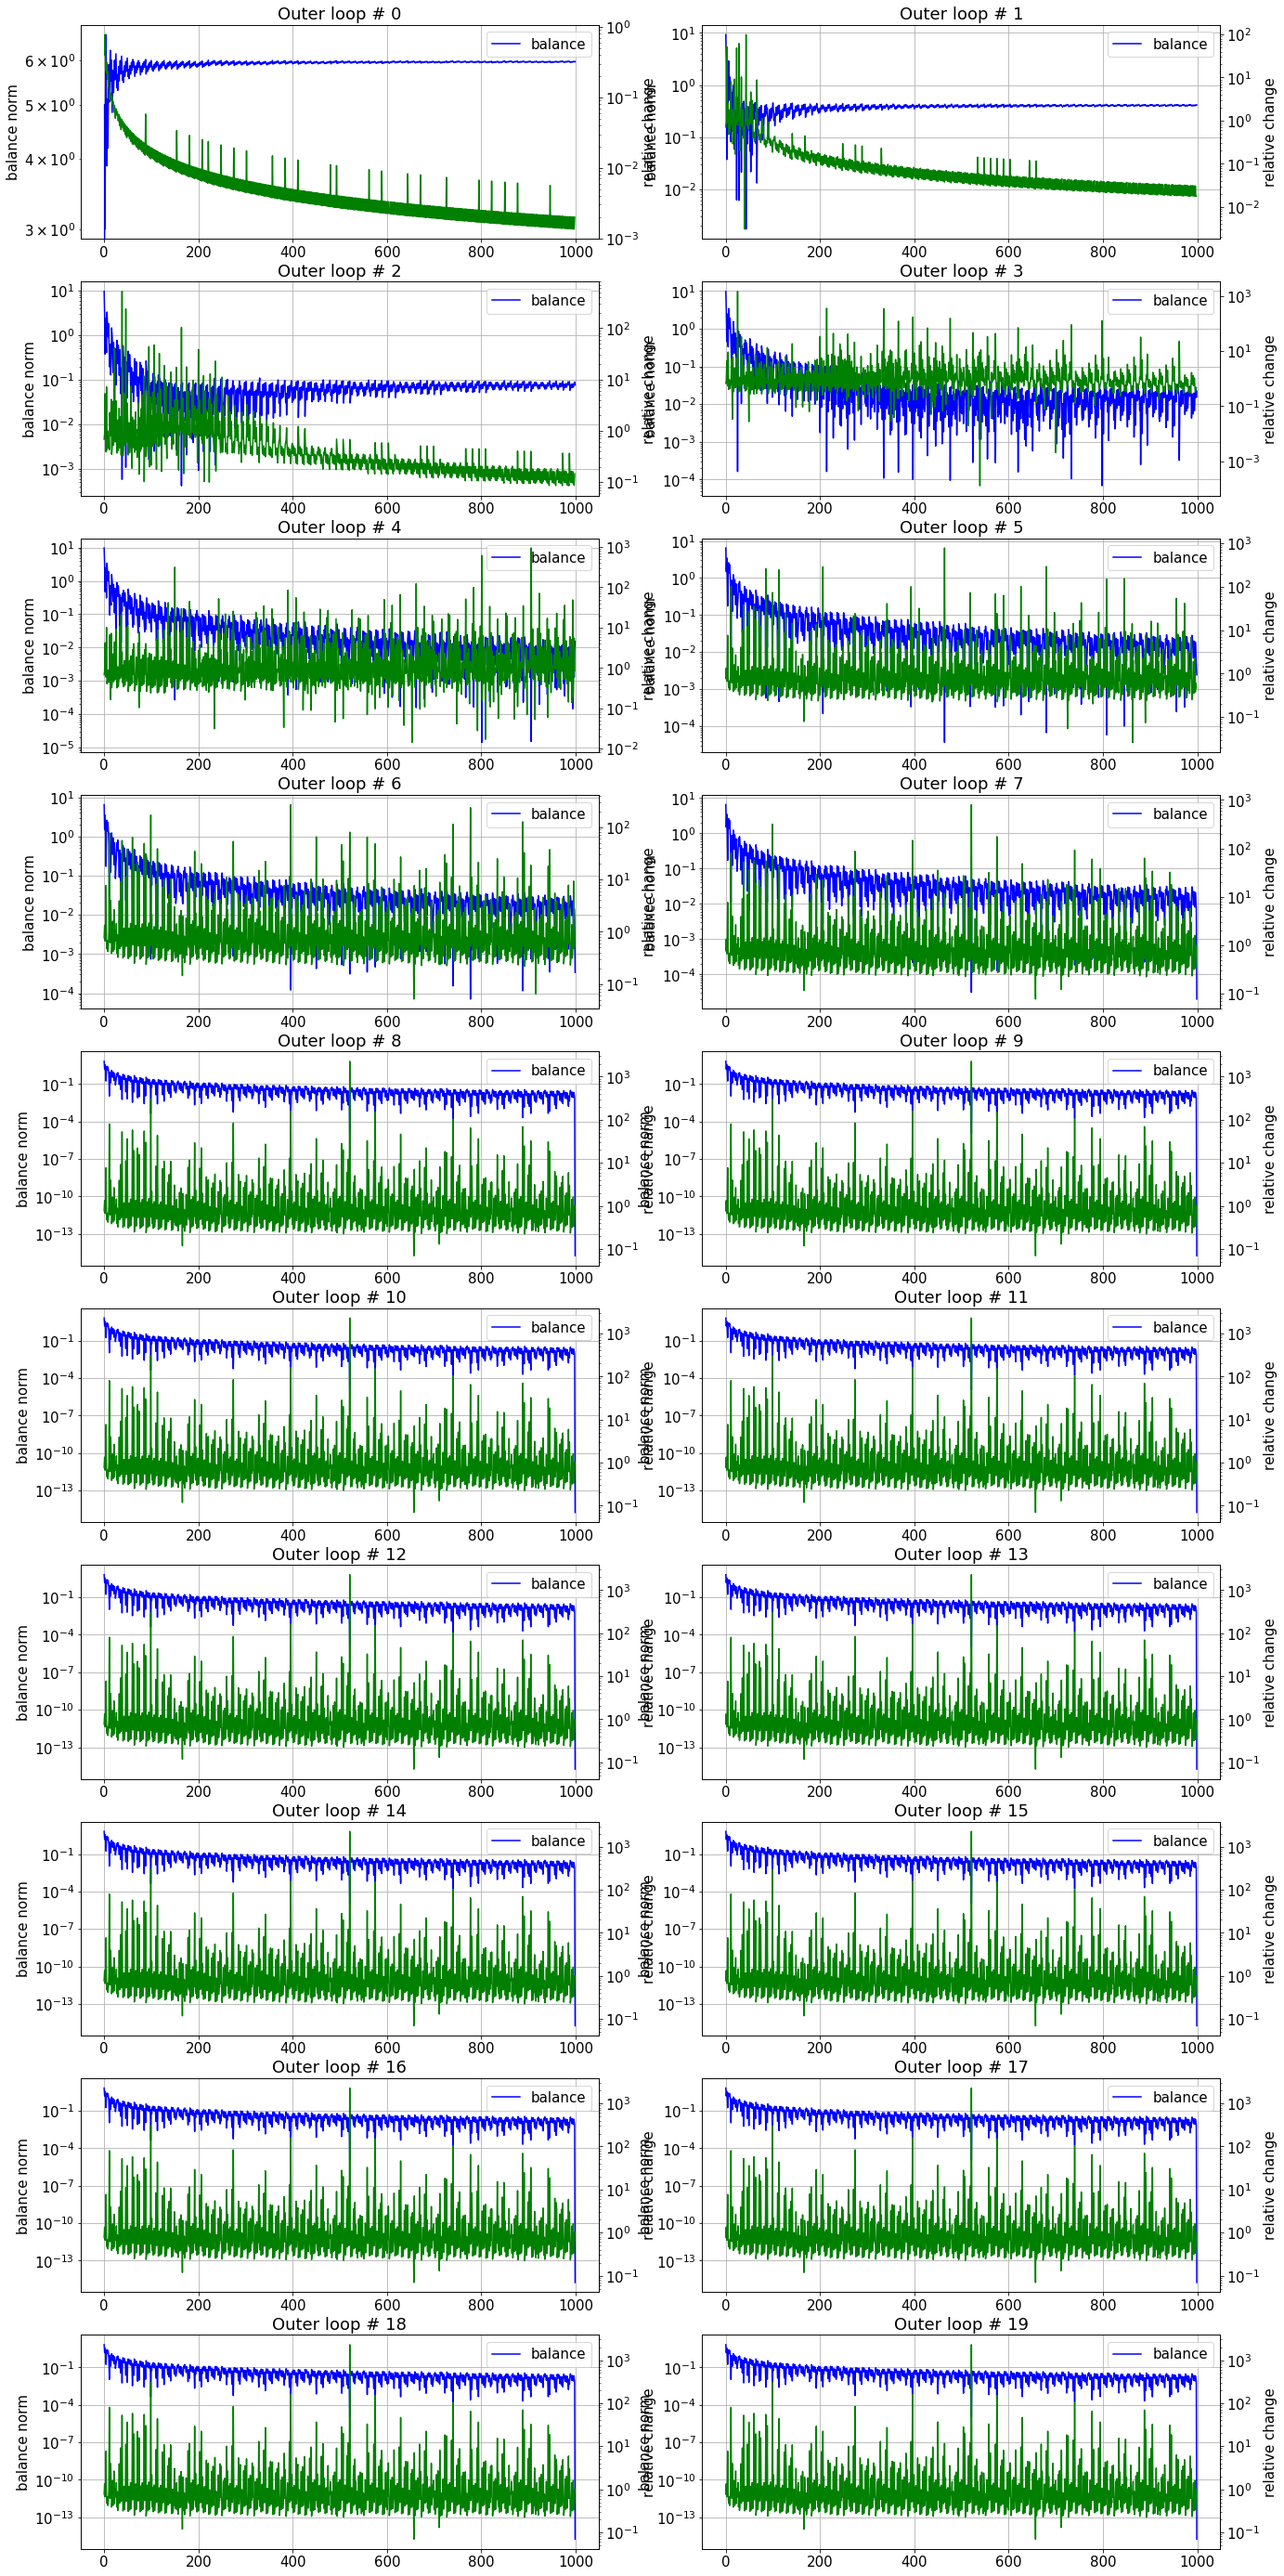

In [89]:
plot_balance_list(balance_list, b_scale='log')

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

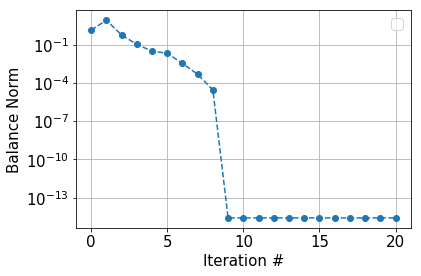

In [90]:
b=np.linalg.norm(balance, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

In [91]:
print_final_flows(G_FW[-1])


('0', '1')  :  9.275056281044291
('0', 'R')  :  6.494304099094499
('0', '1_p')  :  2.780752181949789
('0', '0_p')  :  0.7249437189556943
('1', '0')  :  9.27505628104429
('1', 'R')  :  0.0
('1', '0_p')  :  9.275056281044291
('1', '1_p')  :  7.219247818050208


In [92]:
#Maybe a question of cost of rebalancing edges
G = G_FW[-1][-1]
for e in G.edges():
    print(e, G[e[0]][e[1]]['k'], G[e[0]][e[1]]['cost'], G[e[0]][e[1]]['tot_cost'])

('0', '1') 10.0 39.99631740232384 341.31523988228855
('0', 'R') 6.494304099094502 413999.9999999999 2408087.9599442403
('0', '1_p') 3.0 47.98618901149442 124.57001676406617
('0', '0_p') 1.0 88.0 63.7950472681011
('1', '0') 10.0 39.99631740232383 341.31523988228844
('1', 'R') 1e-06 10000000000000000000000 nan
('1', '0_p') 10.0 47.99631740232384 415.51569013064284
('1', '1_p') 1.0 88.0 635.2938079884183


The costs are properly assigned and we see that there is no cost to edge 1->R, simply because the capacity is deemed too low. 


In [70]:
G_ref=G_FW[-1][-1]

path1=['0', '0_p']
path2=['0','1','0_p']


costs=[]

for path in [path1, path2]:
    c=0
    for i in range(len(path)-1):
        o=path[i]
        d=path[i+1]
        c+=G_ref[o][d]['cost']
    costs.append(c)
        

In [71]:
costs

[88.0, 87.99263480464768]

Do the costs match for the initial initialization? 

In [127]:
for i in range(4):
    G = G_FW[-1][i]
    print("---------------------------------")
    print("Graph #: ", i)
    print("OBJ: ", opt_res[-1]['obj'][i])
    tc = 0
    for e in G.edges():
        print(e, G[e[0]][e[1]]['k'], G[e[0]][e[1]]['cost'], G[e[0]][e[1]]['tot_cost'])
        if not np.isnan(G[e[0]][e[1]]['tot_cost']):
            tc+=G[e[0]][e[1]]['tot_cost']
    print("total cost check: ", tc)
    

---------------------------------
Graph #:  0
OBJ:  2411408.542356374
('0', '1') 10.0 41.4 370.8
('0', 'R') 6.494304099094502 413999.99999999994 2408087.959944241
('0', '1_p') 3.0 710.6666666666669 1773.3333333333335
('0', '0_p') 1.0 88.0 0.0
('1', '0') 10.0 75.96959509178663 725.6490787997229
('1', 'R') 1e-06 10000000000000000000000 nan
('1', '0_p') 10.0 49.4 450.8
('1', '1_p') 1.0 88.0 0.0
total cost check:  2411408.542356374
---------------------------------
Graph #:  1
OBJ:  2410043.8981952276
('0', '1') 10.0 36.06666666666666 120.04444444444447
('0', 'R') 6.494304099094502 414000.00000000006 2408087.9599442417
('0', '1_p') 3.0 52.23045267489712 152.15363511659808
('0', '0_p') 1.0 88.0 586.6666666666666
('1', '0') 10.0 41.037212392578944 363.6957269802818
('1', 'R') 1e-06 10000000000000000000000 nan
('1', '0_p') 10.0 44.06666666666666 146.7111111111111
('1', '1_p') 1.0 88.0 586.6666666666666
total cost check:  2410043.8981952276
---------------------------------
Graph #:  2
OBJ:  2

## new init

In [4]:
n_nodes=2

In [5]:
path='Data/'+str(n_nodes)+'Nodes_back2basics/outputs/'+subfolder

In [6]:
print(os.listdir(path))

['new_init.pkl', 'initial_setup.pkl']


In [7]:
filename=os.listdir(path)[0]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

new_init.pkl


In [8]:
params

{'L': 10000,
 'ni': 1000,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

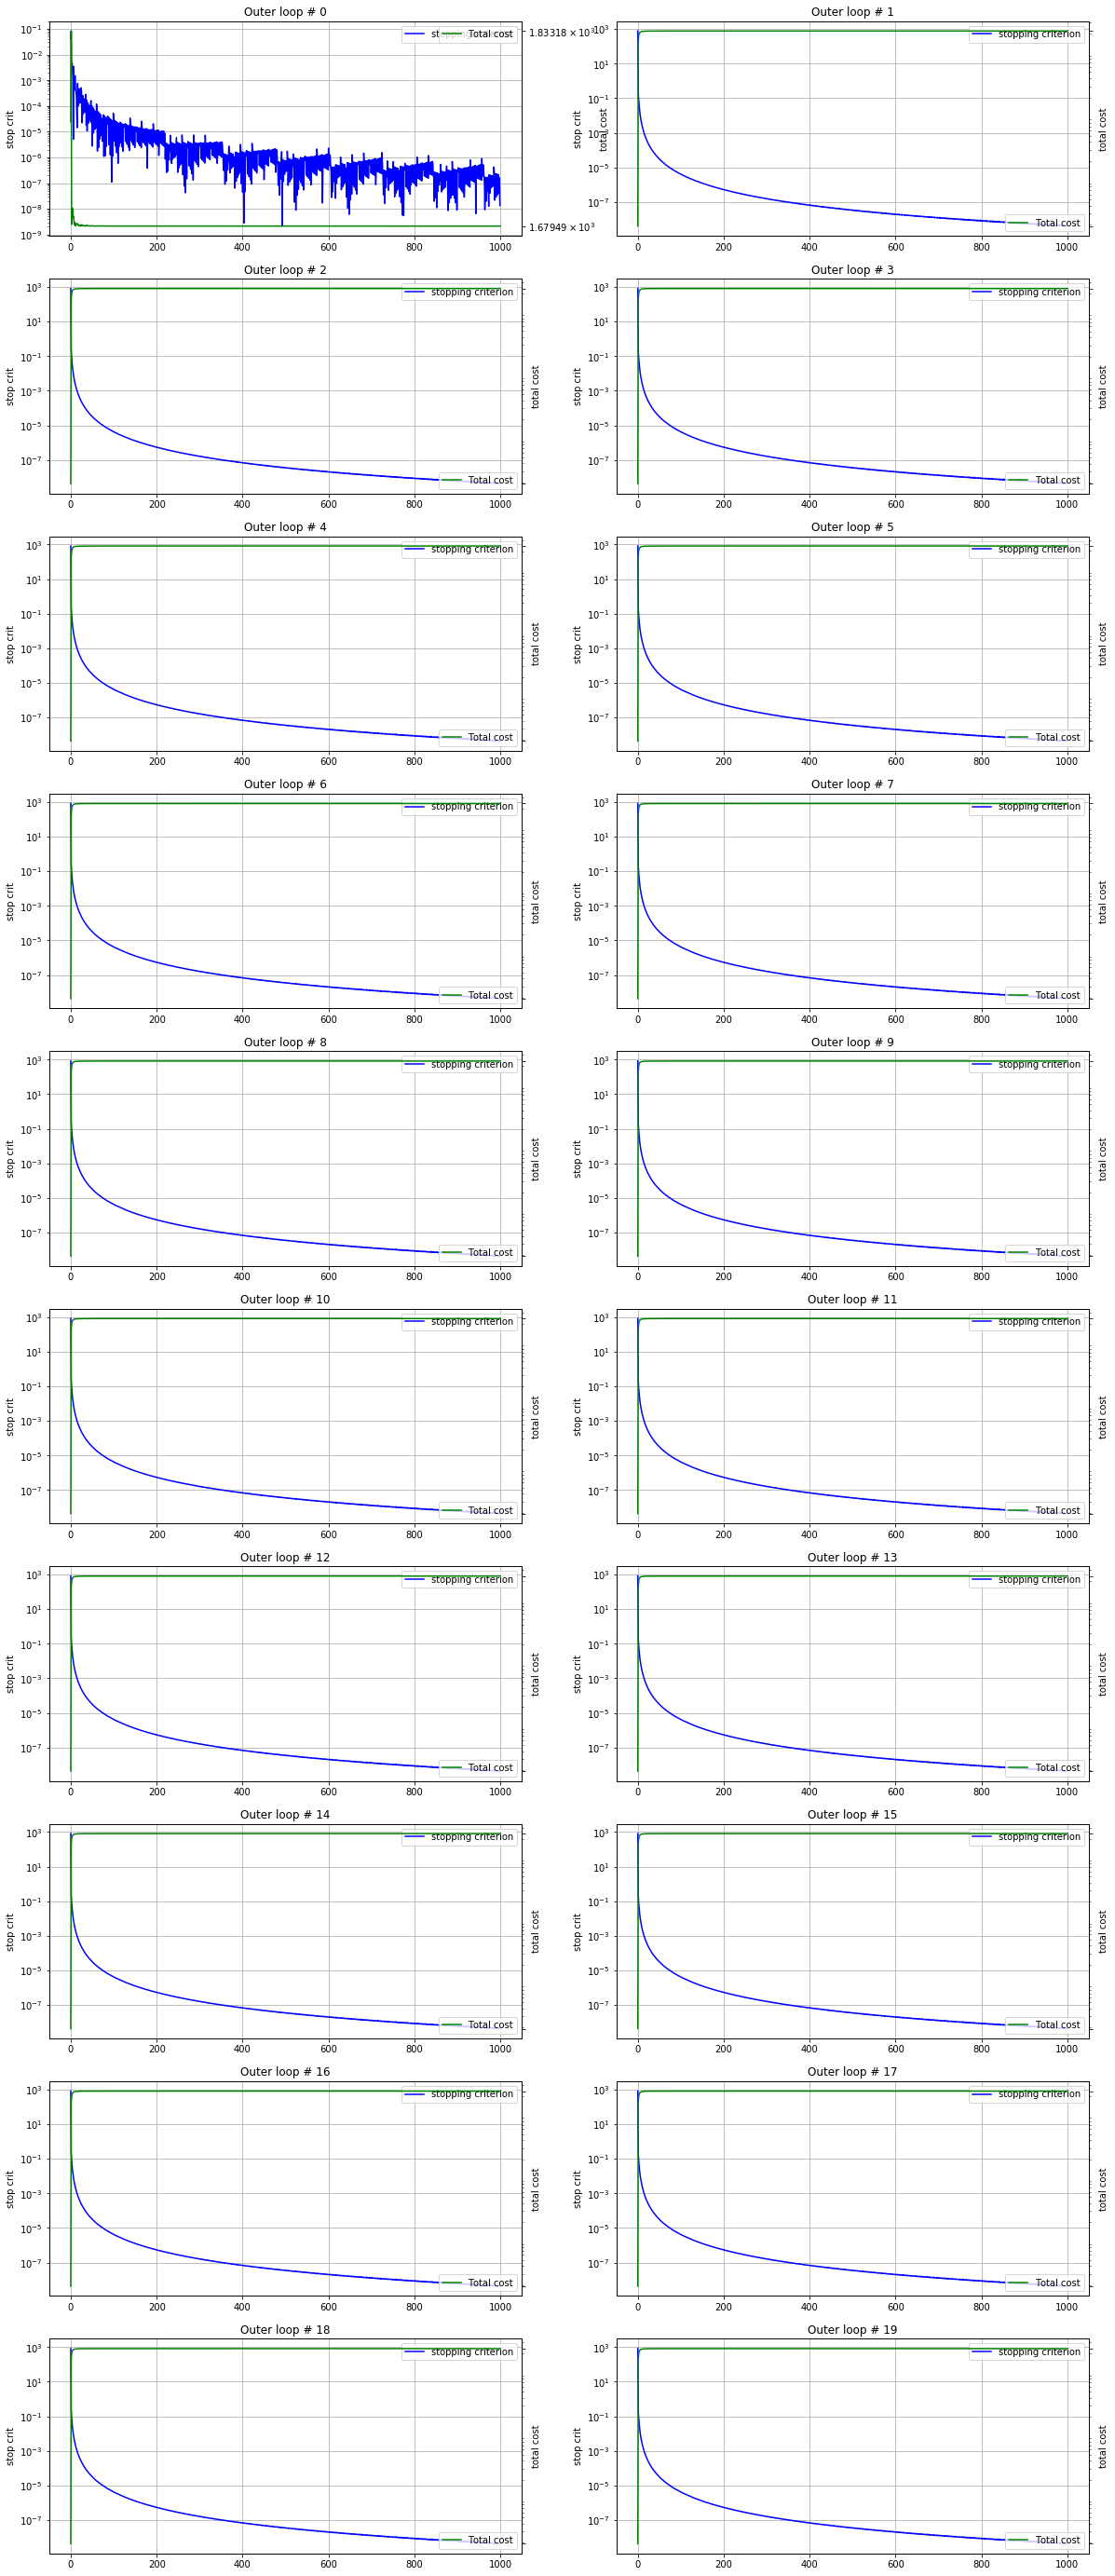

In [9]:
plot_stop_and_cost(opt_res)

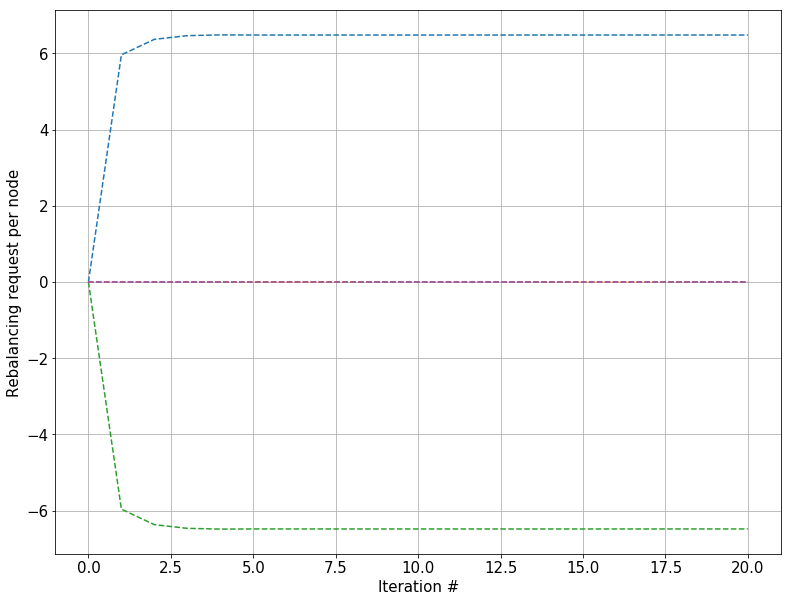

In [10]:
plot_ri_list(ri_FW, save = False, path = None)

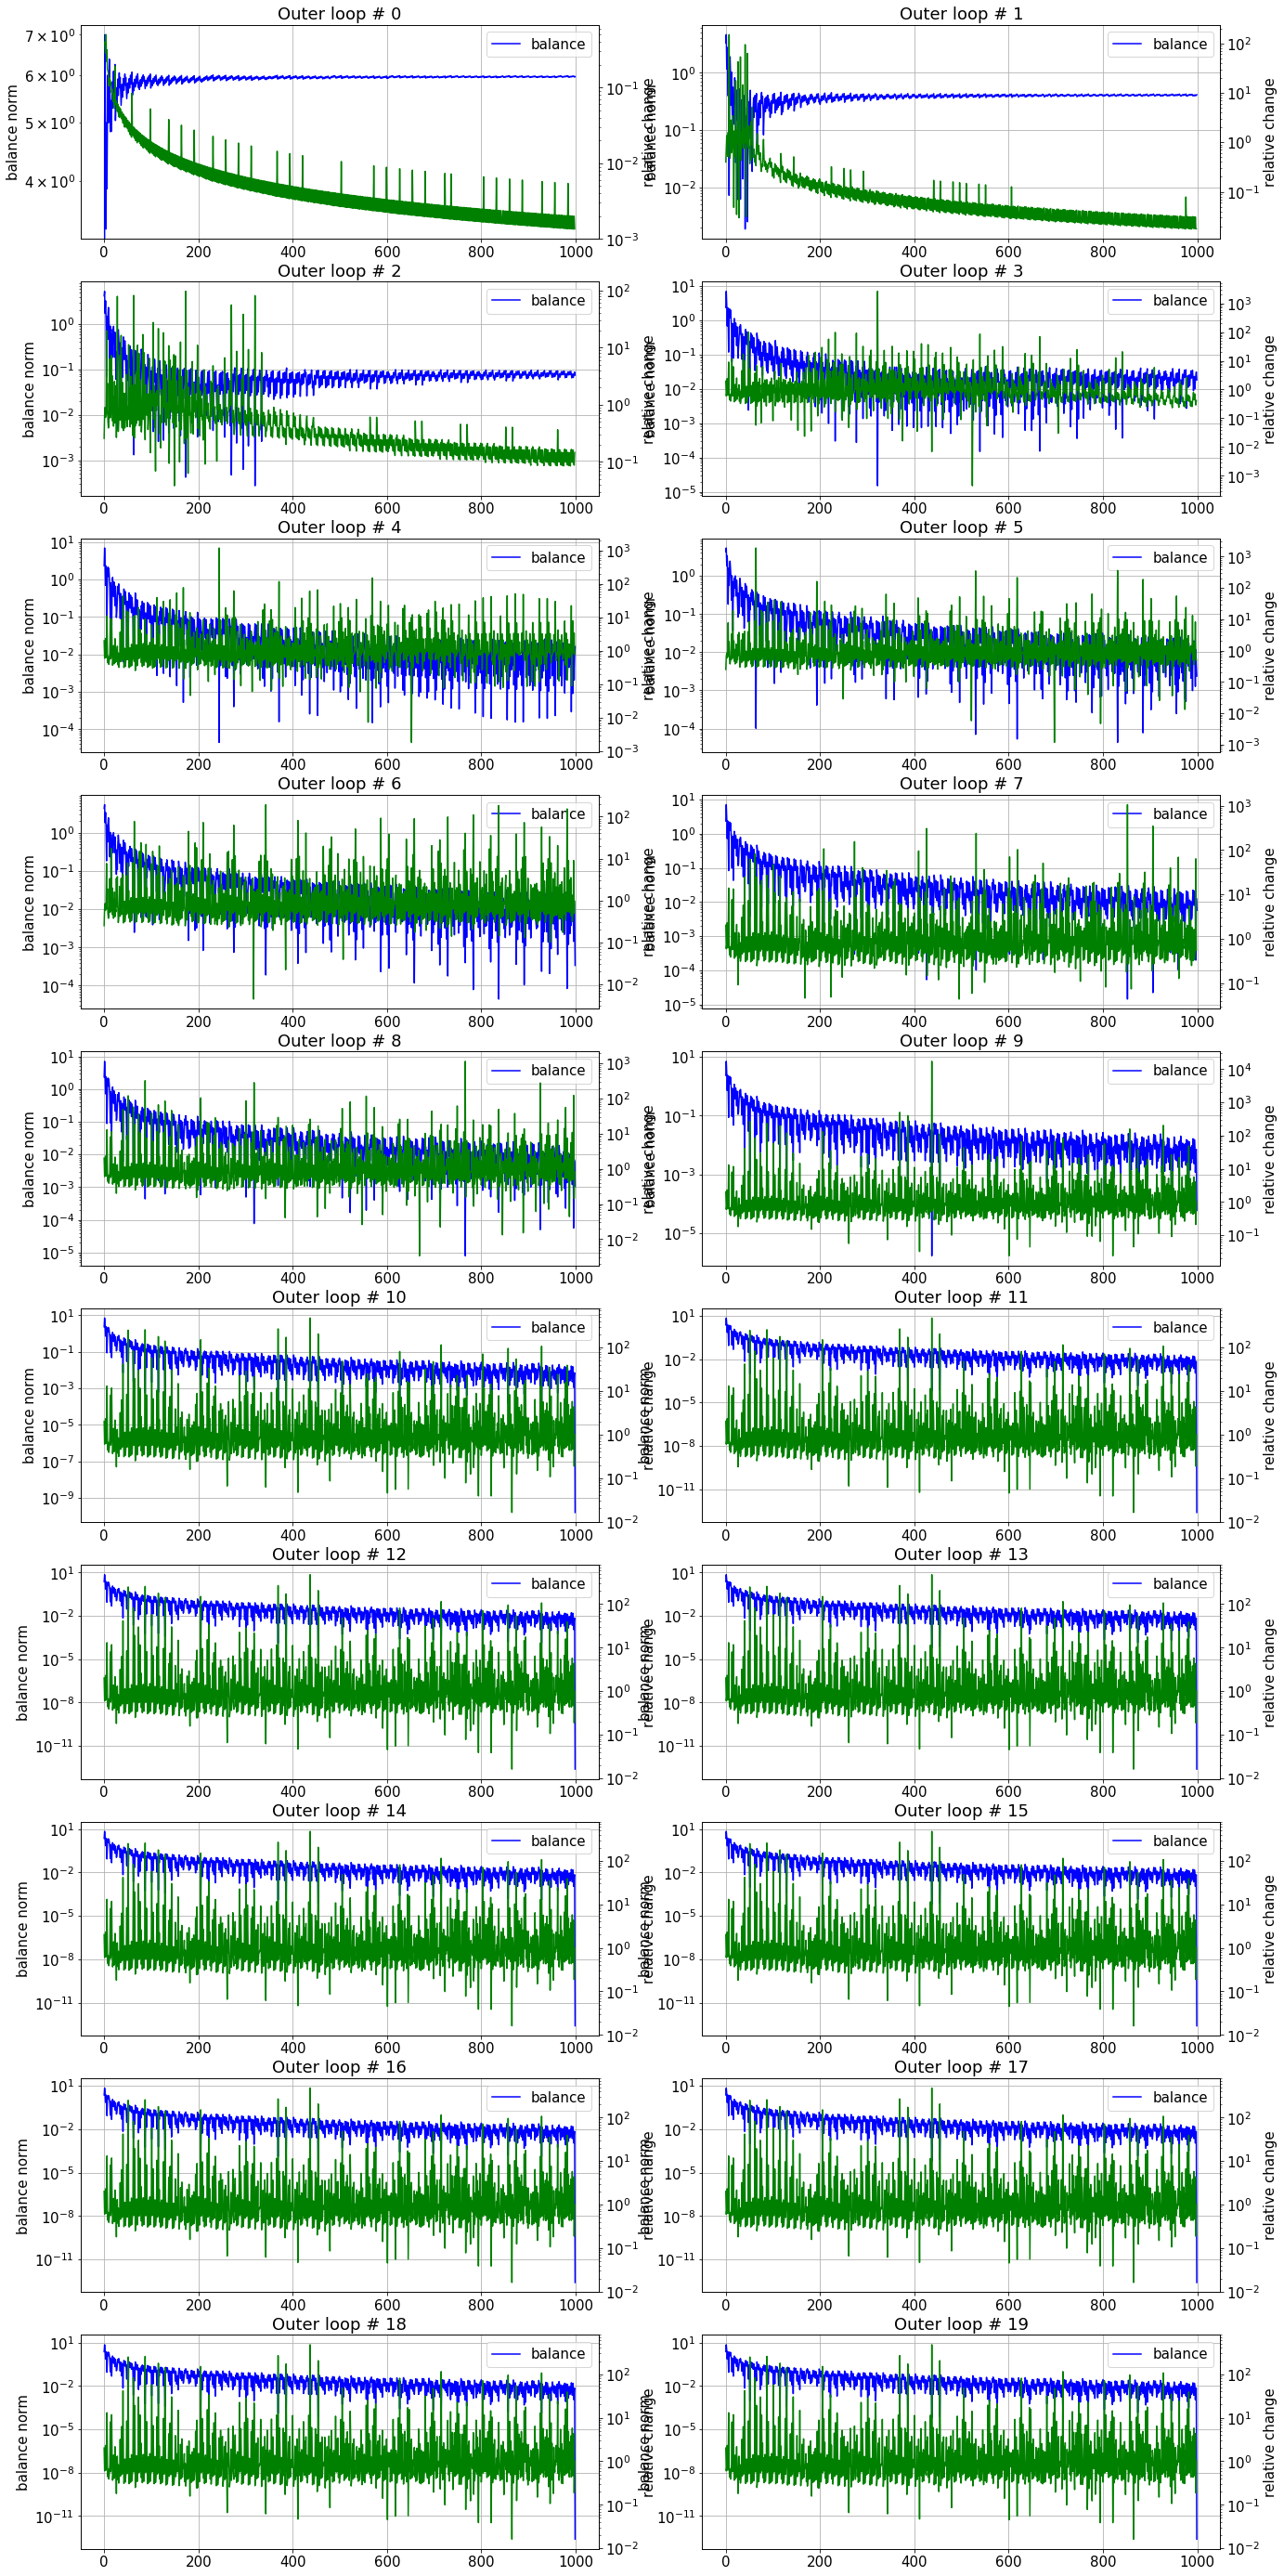

In [206]:
plot_balance_list(balance_list, b_scale='log')

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

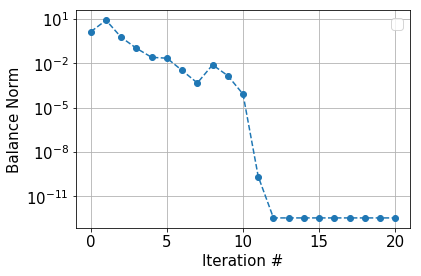

In [207]:
b=np.linalg.norm(balance, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

In [208]:
print_final_flows(G_FW[-1])


('0', '1')  :  9.271206380857187
('0', 'R')  :  6.481562349825828
('0', '1_p')  :  2.7896311066798365
('0', '0_p')  :  0.7287936191424493
('1', '0')  :  9.271206380856936
('1', 'R')  :  0.0
('1', '0_p')  :  9.271206380857555
('1', '1_p')  :  7.210368893320161


In [179]:
#Maybe a question of cost of rebalancing edges
G = G_FW[-1][-1]
for e in G.edges():
    print(e, G[e[0]][e[1]]['k'], G[e[0]][e[1]]['cost'], G[e[0]][e[1]]['tot_cost'])

('0', '1') 10.0 39.99632976818805 341.3155268550194
('0', 'R') 6.484805583250253 413999.5692942704 2404560.556923703
('0', '1_p') 3.0 48.040949528600905 125.02621151394906
('0', '0_p') 1.0 88.0 63.795553779824154
('1', '0') 10.0 39.99630005377845 341.3148372762598
('1', 'R') 1e-06 10000000000000000000000 nan
('1', '0_p') 10.0 47.996307482365786 415.51541387274676
('1', '1_p') 1.0 88.0 634.4576864993383


We see we have the same behavior here. 

In [180]:
G_ref=G_FW[-1][-1]

path1=['0', '0_p']
path2=['0','1','0_p']


costs=[]

for path in [path1, path2]:
    c=0
    for i in range(len(path)-1):
        o=path[i]
        d=path[i+1]
        c+=G_ref[o][d]['cost']
    costs.append(c)
        

In [181]:
costs

[88.0, 87.99263725055383]

In [209]:
for i in range(4):
    G = G_FW[-1][i]
    print("---------------------------------")
    print("Graph #: ", i)
    print("OBJ: ", opt_res[-1]['obj'][i])
    tc = 0
    for e in G.edges():
        print(e, G[e[0]][e[1]]['k'], G[e[0]][e[1]]['cost'], G[e[0]][e[1]]['tot_cost'])
        if not np.isnan(G[e[0]][e[1]]['tot_cost']):
            tc+=G[e[0]][e[1]]['tot_cost']
    print("total cost check: ", tc)
    

---------------------------------
Graph #:  0
OBJ:  1921.2960591032224
('0', '1') 10.0 39.98968613757184 341.1612658903488
('0', 'R') 6.481575274177473 360000.0 2.4598697681248883e-08
('0', '1_p') 3.0 48.0373445230341 124.99630630636501
('0', '0_p') 1.0 88.0 64.13383306103398
('1', '0') 10.0 39.989685925398774 341.16126096115636
('1', 'R') 1e-06 10000000000000000000000 nan
('1', '0_p') 10.0 47.98968645583153 415.33092482404516
('1', '1_p') 1.0 88.0 634.5124680356743
total cost check:  1921.2960591032224
---------------------------------
Graph #:  1
OBJ:  1566725.6724872077
('0', '1') 10.0 40.89408176429276 360.8048535420931
('0', 'R') 6.481575274177473 370666.6666666669 1564796.3061925434
('0', '1_p') 3.0 44.04984375954363 40.92385837398902
('0', '0_p') 1.0 88.0 21.377944353677993
('1', '0') 10.0 37.6293223473068 269.2274091403429
('1', 'R') 1e-06 10000000000000000000000 nan
('1', '0_p') 10.0 48.89408188794721 438.8614065757305
('1', '1_p') 1.0 88.0 798.170822678558
total cost check:  

The cost correpondance is restored, but it is monotonically increasing now... 

In [210]:
for i in range(10):
    print(opt_res[-1]['obj'][i])

1921.2960591032224
1566725.6724872077
1974606.8782489088
2143295.04144968
2229312.253298257
2279040.566897848
2310317.6915100412
2331276.8088093903
2346005.9925921643
2356733.2840897706


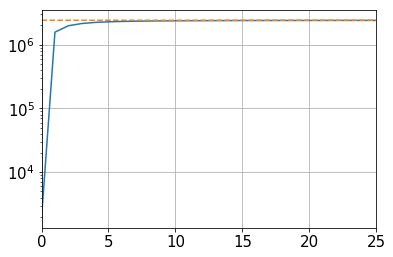

In [211]:
plt.figure()
plt.plot(opt_res[-1]['obj'])
plt.plot(opt_res1[-1]['obj'], '--')
plt.xlim([0,25])
plt.grid()
plt.yscale("log")

## Comparison of both init schemes

What do I see? 
- final flows are very close, as well as path costs
- The cost shape for the new init is very strange as it goes up in the beginning. 
- the relative progress for the new scheme does not go as far either (only limited to -6)

## Hypotheses

### Cost of rebalancing edges not properly updated

Initial setup

In [16]:
#Maybe a question of cost of rebalancing edges
G = G_FW[-1][-1]
for e in G.edges():
    print(e, G[e[0]][e[1]]['k'], G[e[0]][e[1]]['cost'], G[e[0]][e[1]]['tot_cost'])

('0', '1') 10.0 39.99631740232384 341.31523988228855
('0', 'R') 6.494304099094502 413999.9999999999 2408087.9599442403
('0', '1_p') 3.0 47.98618901149442 124.57001676406617
('0', '0_p') 1.0 88.0 63.7950472681011
('1', '0') 10.0 39.99631740232383 341.31523988228844
('1', 'R') 1e-06 10000000000000000000000 nan
('1', '0_p') 10.0 47.99631740232384 415.51569013064284
('1', '1_p') 1.0 88.0 635.2938079884183


New setup

In [144]:
#Maybe a question of cost of rebalancing edges
G = G_FW[-1][-1]
for e in G.edges():
    print(e, G[e[0]][e[1]]['k'], G[e[0]][e[1]]['cost'], G[e[0]][e[1]]['tot_cost'])

('0', '1') 10.0 39.99632976818805 341.3155268550194
('0', 'R') 6.484805583250253 413999.5692942704 2404560.556923703
('0', '1_p') 3.0 48.040949528600905 125.02621151394906
('0', '0_p') 1.0 88.0 63.795553779824154
('1', '0') 10.0 39.99630005377845 341.3148372762598
('1', 'R') 1e-06 10000000000000000000000 nan
('1', '0_p') 10.0 47.996307482365786 415.51541387274676
('1', '1_p') 1.0 88.0 634.4576864993383


Observations: 
- Absolutely no difference in the costs per edges
- if we look at the final value of total cost after inner iterations are over -- no difference either... 

### The first few graphs have costs that are not properly initialized

We have checked this. There was a slight inconsistency but it is solved now. 

In [118]:
for i in range(4):
    G = G_FW[-1][i]
    print("---------------------------------")
    print("Graph #: ", i)
    print("OBJ: ", opt_res[-1]['obj'][i])
    tc = 0
    for e in G.edges():
        print(e, G[e[0]][e[1]]['k'], G[e[0]][e[1]]['cost'], G[e[0]][e[1]]['tot_cost'])
        if not np.isnan(G[e[0]][e[1]]['tot_cost']):
            tc+=G[e[0]][e[1]]['tot_cost']
    print("total cost check: ", tc)
    

---------------------------------
Graph #:  0
OBJ:  1989.133730705184
('0', '1') 10.0 54.4640484267446 341.3155268550194
('0', 'R') 6.484805583250253 360000.0 2404560.556923703
('0', '1_p') 3.0 84.08473747908617 125.02621151394906
('0', '0_p') 1.0 88.0 63.795553779824154
('1', '0') 10.0 36.32468634983349 341.3148372762598
('1', 'R') 1e-06 10000000000000000000000 nan
('1', '0_p') 10.0 45.38266072426001 415.51541387274676
('1', '1_p') 1.0 88.0 634.4576864993383
total cost check:  2406481.9821535004
---------------------------------
Graph #:  1
OBJ:  1567538.6532014355
('0', '1') 10.0 36.227951215145 163.38575127080222
('0', 'R') 6.484805583250253 370666.6666666667 1565576.1745873515
('0', '1_p') 3.0 44.494873302210934 72.79051847930563
('0', '0_p') 1.0 88.0 671.3387118653287
('1', '0') 10.0 36.687705502482025 215.8791917851936
('1', 'R') 1e-06 10000000000000000000000 nan
('1', '0_p') 10.0 44.017069885484695 104.33873912254818
('1', '1_p') 1.0 88.0 734.745701561065
total cost check:  1567

### The initialization is not correct (in the end, it is the only thing that changes) 

**Reminder**: how are the ri computed? 
- Initialization of all ri to 0
- We loop through the nodes
    - for the origin of the edge, we add the flow
    - for the destination of the edge, we substract the flow

Therefore, 
- A node with ri>0 is a node that is in deficit of rebalancers
- A node with ri<0 is a node that is in excess of rebalancers


**Reminder**: how do we update OD? 
- We add a pair $(n,R)$ for each node $n$ that is in excess. 

Currently we are solving the following problem: 
$$
\min_{f} \|f-f_r\| \\
\text{s.t.    } A_{out} f - A_{in} f = r
$$

What is the ri? 

What flows would we expect? 

How does the initialization compare? 

Is the new really feasible? (really check the meaning of ri)

# 10 Nodes

In [3]:
n_nodes=10

In [4]:
path='Data/'+str(n_nodes)+'Nodes/outputs/'+subfolder

In [5]:
print(os.listdir(path))

['ni_to_10000.pkl', 'init_passengers.pkl', 'initial_setup.pkl', 'ni_to_5000.pkl', 'init_nearest.pkl']


In [6]:
filename=os.listdir(path)[-1]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

init_nearest.pkl


In [7]:
params

{'L': 10000,
 'ni': 1000,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

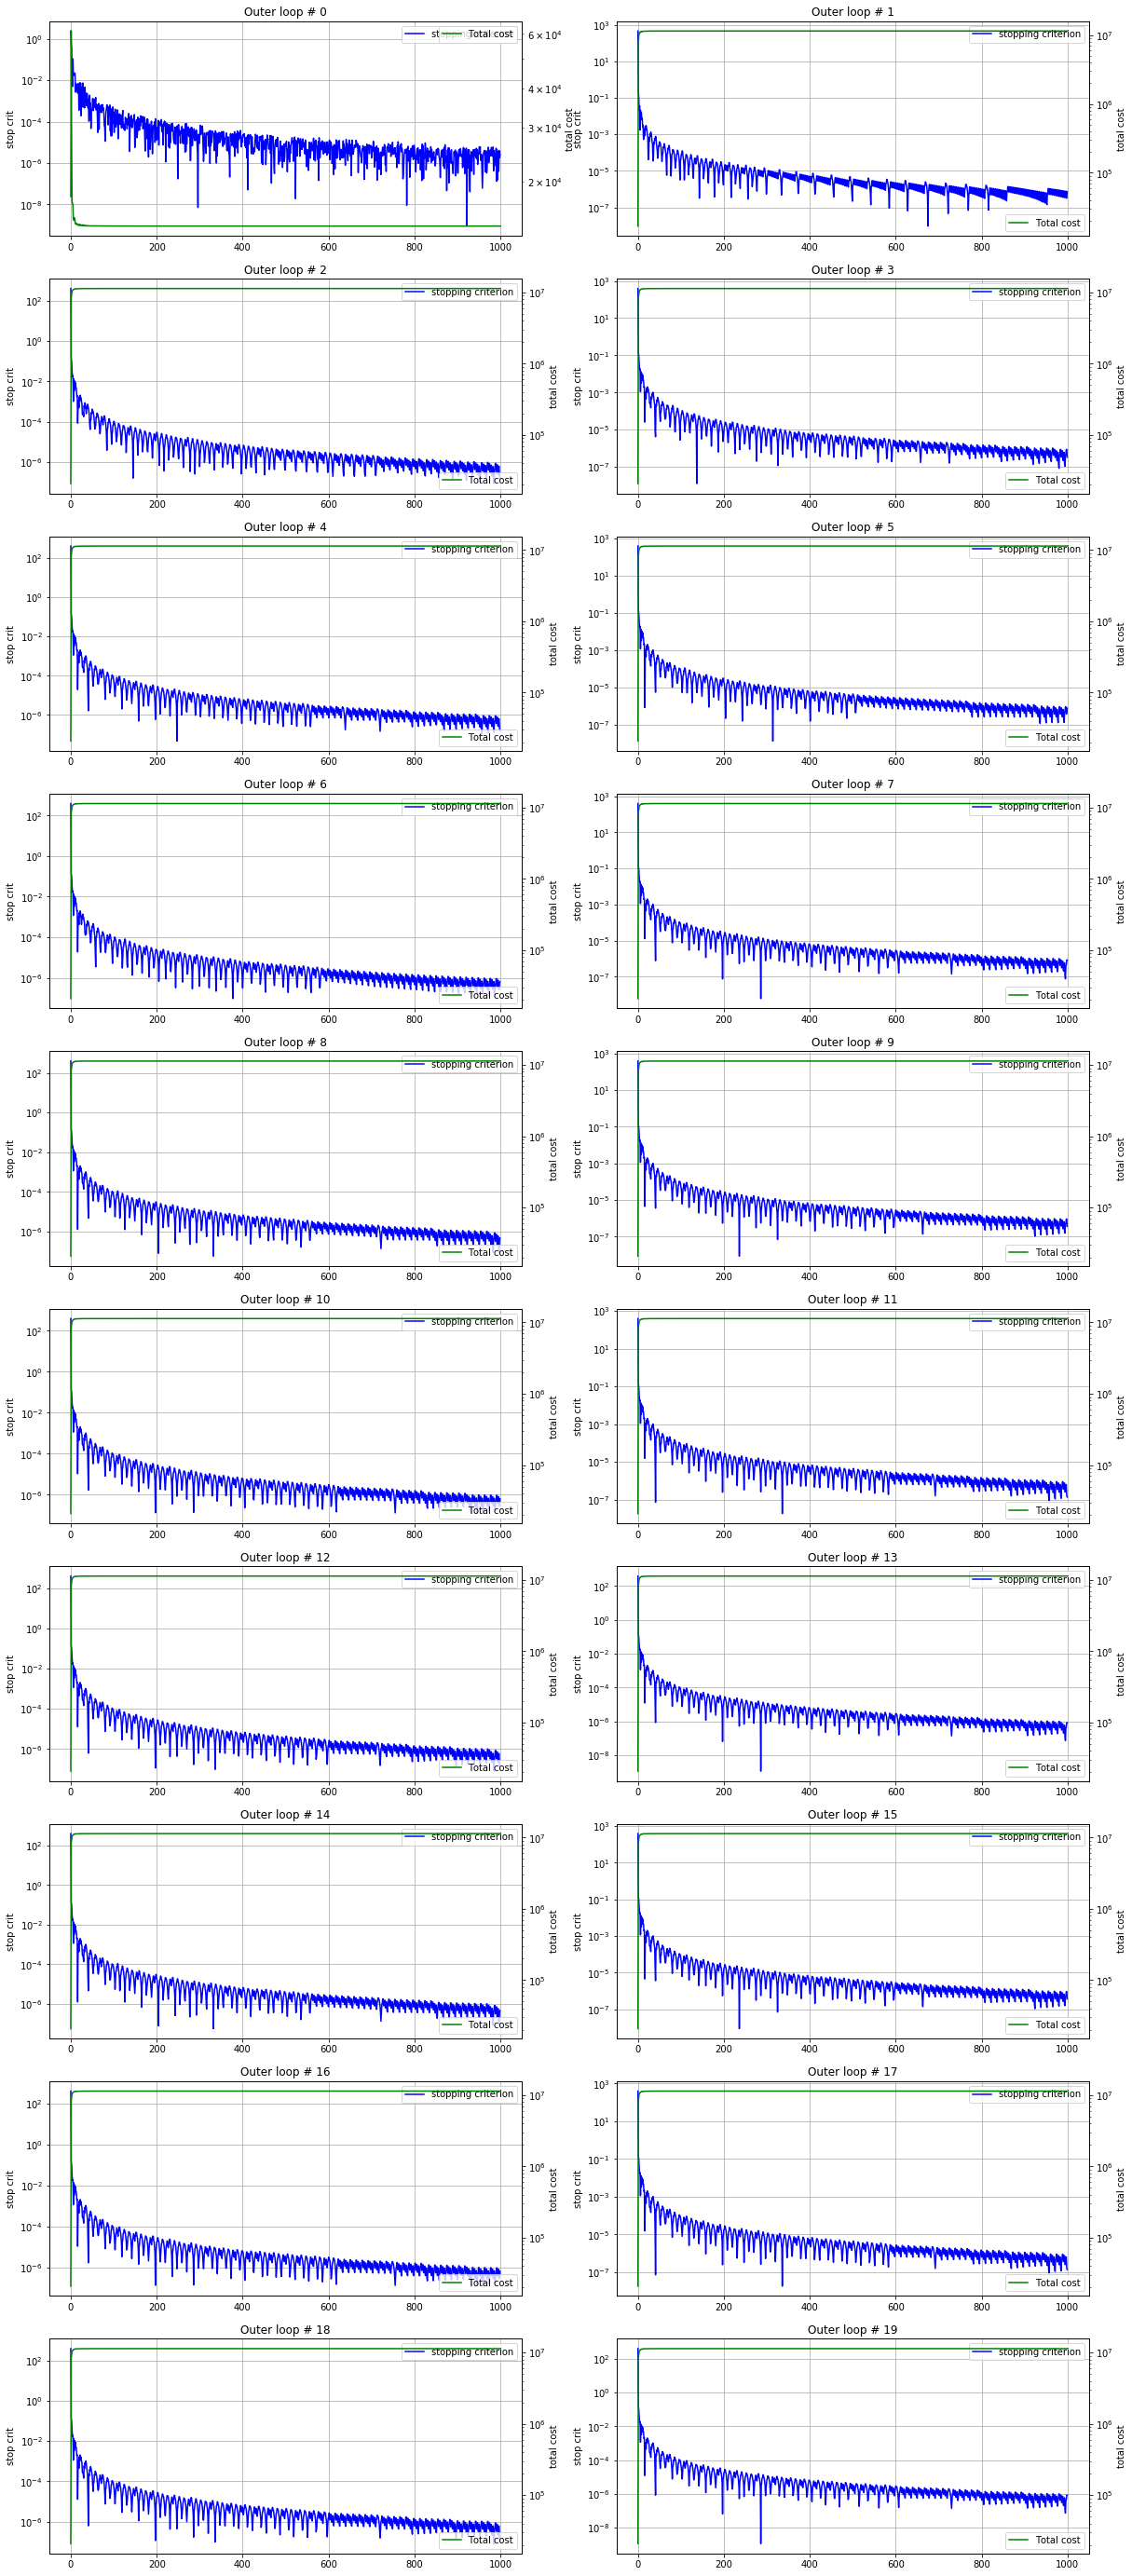

In [8]:
plot_stop_and_cost(opt_res)

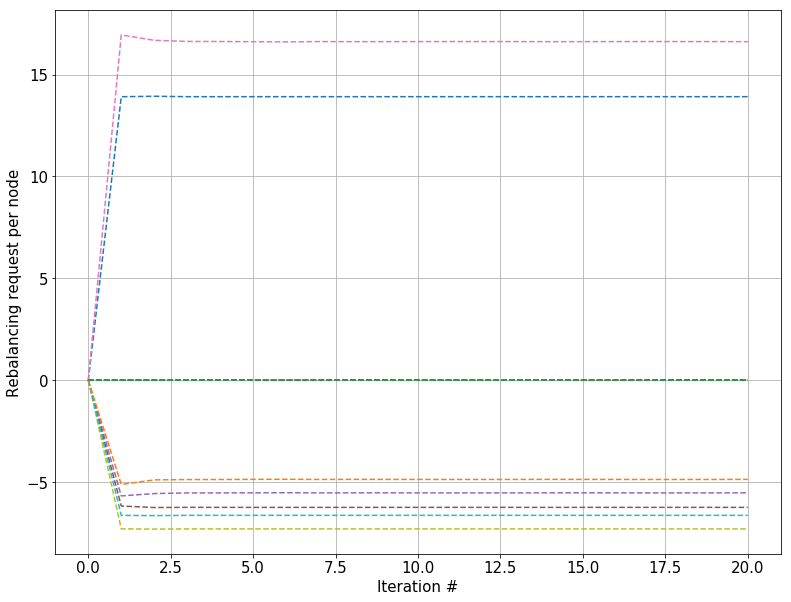

In [9]:
plot_ri_list(ri_FW, save = False, path = None)

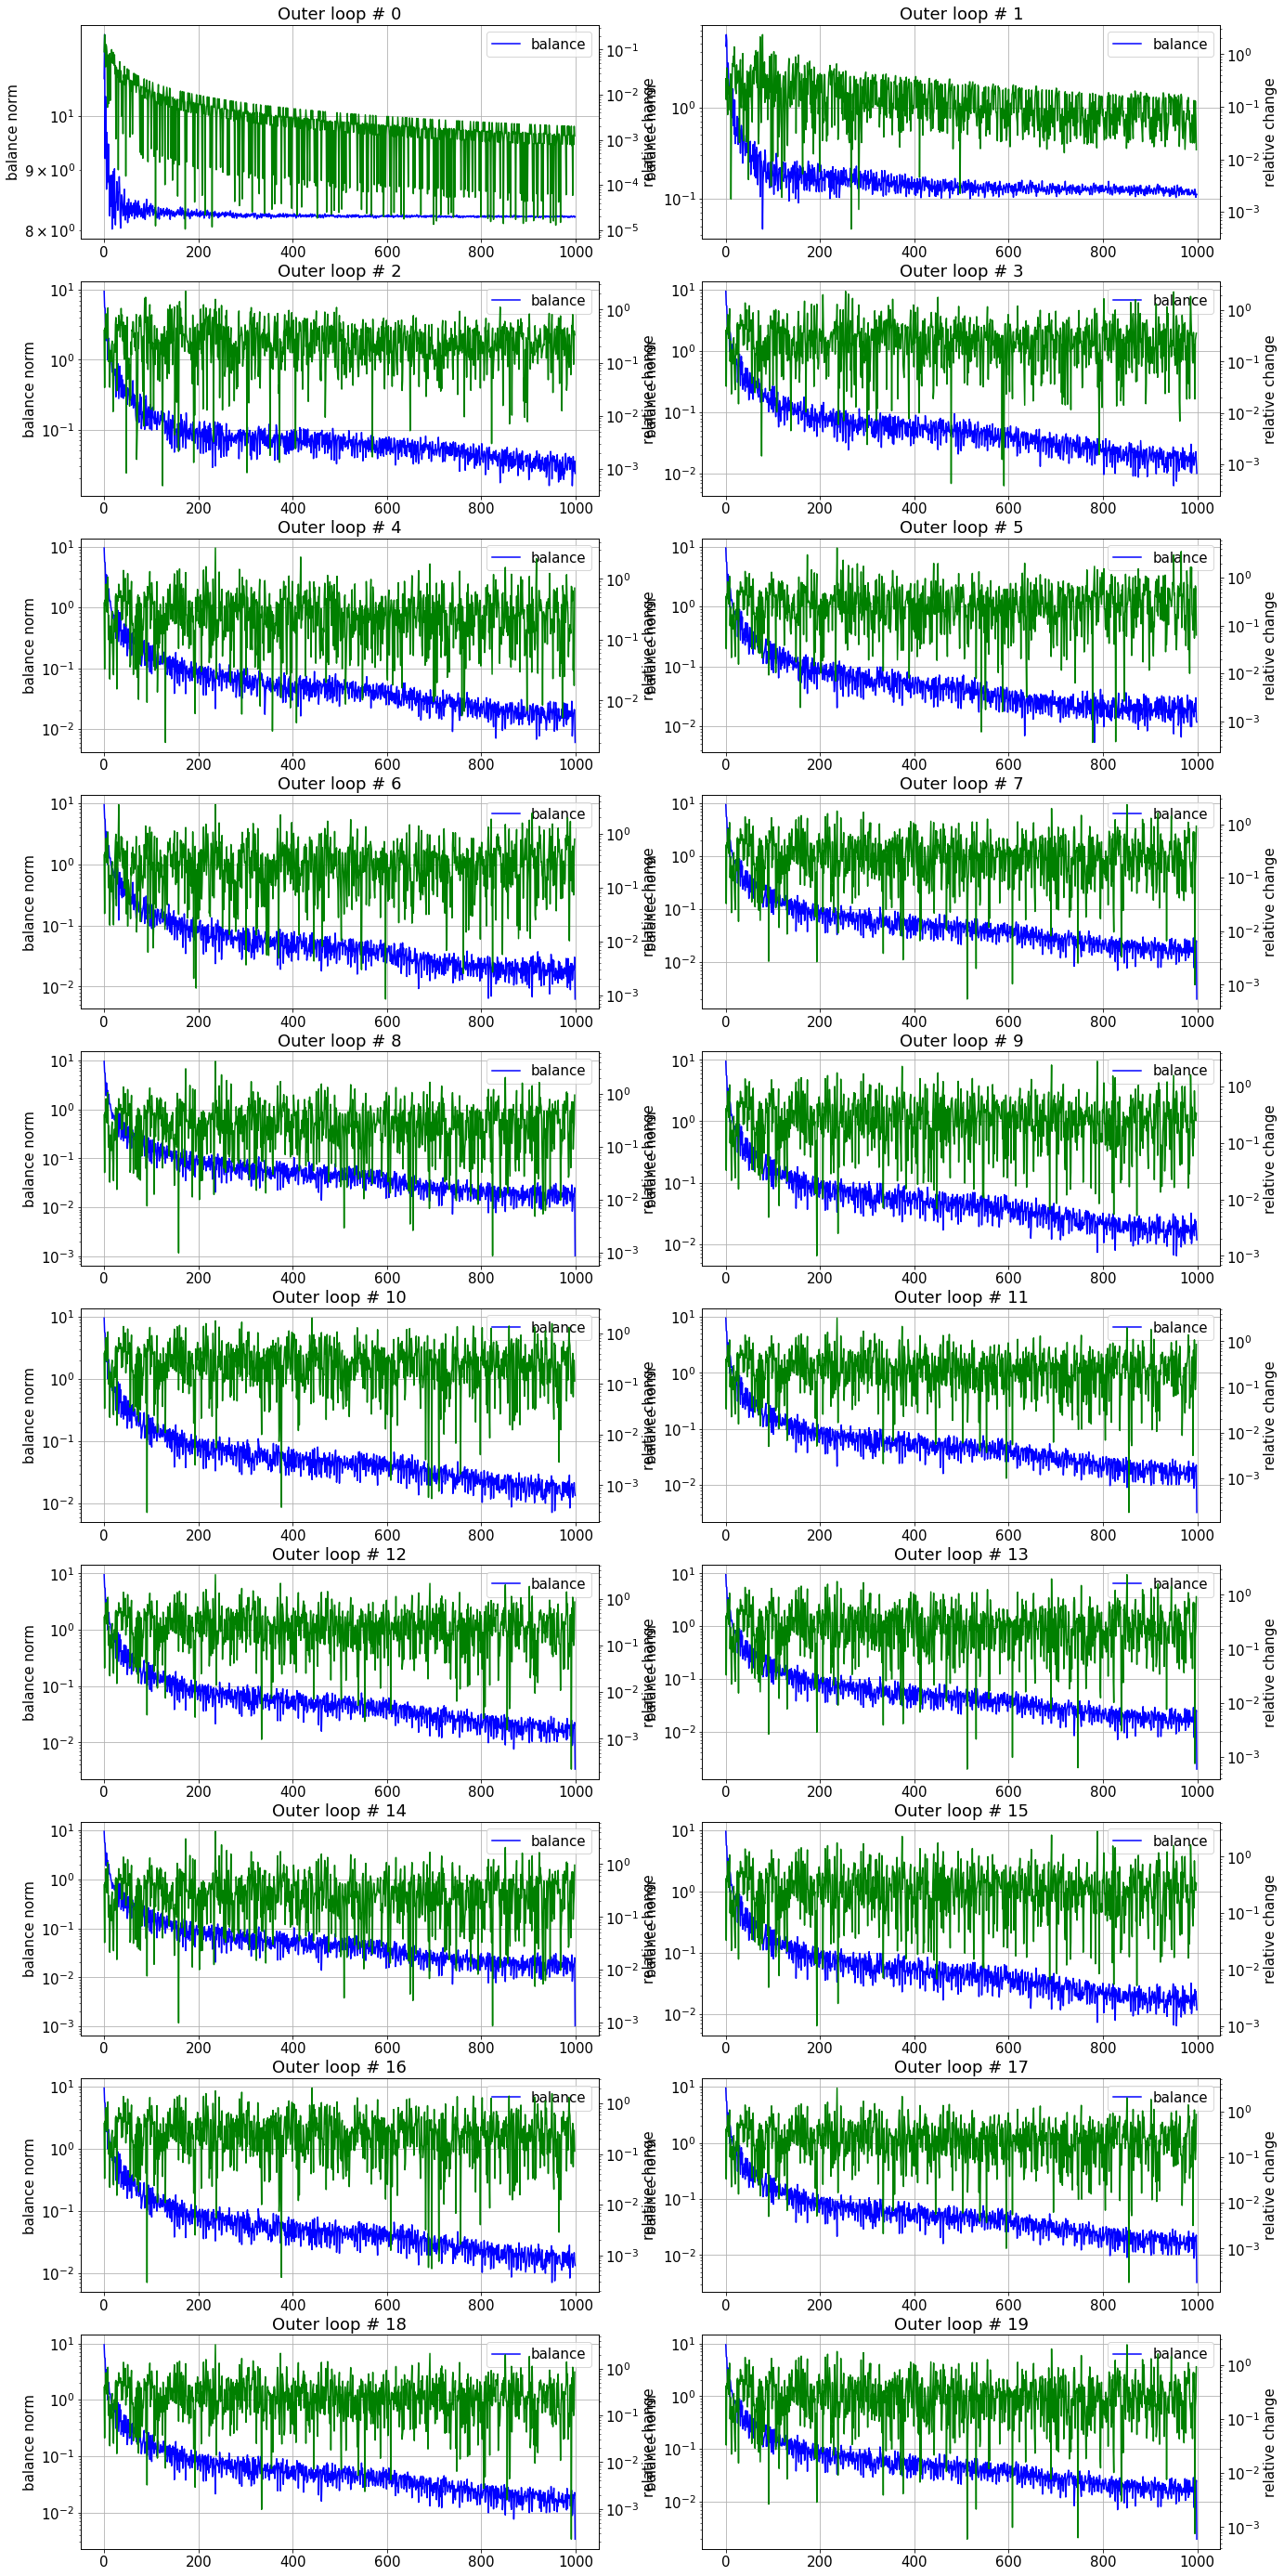

In [10]:
plot_balance_list(balance_list, b_scale='log')

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

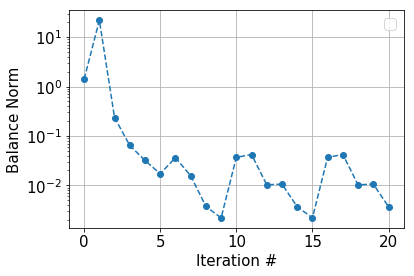

In [11]:
b=np.linalg.norm(balance, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')